## 2025-26 Individual Project

- Flavio Gordon

In [1]:
import re  # Regular expressions (text cleaning / pattern extraction)
import unicodedata  # Normalize text (remove accents) for reliable joins
import numpy as np  # Numerical operations + NaN handling
import pandas as pd  # DataFrames: load/clean/merge data
import matplotlib.pyplot as plt  # Base plotting library
import seaborn as sns  # Statistical plotting built on matplotlib
from requests.utils import requote_uri  # Fix GitHub raw URLs with spaces/parentheses safely

In [2]:
pd.set_option("display.max_columns", 200)  # Show more columns when printing DataFrames
pd.set_option("display.max_rows", 120)  # Show more rows when printing DataFrames
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")  # Format floats with commas + 2 decimals

sns.set_theme(style="whitegrid")  # Clean theme with grid for readability
plt.rcParams["figure.figsize"] = (12, 6)  # Default figure size
plt.rcParams["axes.titlesize"] = 14  # Default title size
plt.rcParams["axes.labelsize"] = 12  # Default axis label size
plt.rcParams["xtick.labelsize"] = 11  # Default x-tick label size
plt.rcParams["ytick.labelsize"] = 11  # Default y-tick label size

In [3]:
datasets = {  # Map: dataset_name -> GitHub RAW CSV URL
    "lesiones": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/European%20Football%20Injuries%20(2020-2025)-dataset.csv",

    "bundesliga_22_23": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/bundesliga/germany-bundesliga-players-2022-to-2023-stats.csv",
    "bundesliga_23_24": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/bundesliga/germany-bundesliga-players-2023-to-2024-stats.csv",
    "bundesliga_24_25": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/bundesliga/germany-bundesliga-players-2024-to-2025-stats.csv",

    "premier_22_23": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/premier_league/england-premier-league-players-2022-to-2023-stats.csv",
    "premier_23_24": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/premier_league/england-premier-league-players-2023-to-2024-stats.csv",
    "premier_24_25": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/premier_league/england-premier-league-players-2024-to-2025-stats.csv",

    "laliga_22_23": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/spain_league/spain-la-liga-players-2022-to-2023-stats.csv",
    "laliga_23_24": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/spain_league/spain-la-liga-players-2023-to-2024-stats.csv",
    "laliga_24_25": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/spain_league/spain-la-liga-players-2024-to-2025-stats%20(1).csv",

    "seriea_22_23": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/serie_A/italy-serie-a-players-2022-to-2023-stats%20(1).csv",
    "seriea_23_24": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/serie_A/italy-serie-a-players-2023-to-2024-stats%20(1).csv",
    "seriea_24_25": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/serie_A/italy-serie-a-players-2024-to-2025-stats%20(1).csv",

    "ligue1_22_23": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/ligue_one/france-ligue-1-players-2022-to-2023-stats.csv",
    "ligue1_23_24": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/ligue_one/france-ligue-1-players-2023-to-2024-stats.csv",
    "ligue1_24_25": "https://raw.githubusercontent.com/flaviogordon30/MN5813--INDIVIDUAL-PROJECT/main/raw_data/salaries/ligue_one/france-ligue-1-players-2024-to-2025-stats.csv",
}

print("🔄 LOADING DATASETS...\n")  # Progress message

dfs = {}  # Dict to store DataFrames in RAM (nothing is saved to disk)

for name, url in datasets.items():  # Loop through every dataset URL
    try:
        dfs[name] = pd.read_csv(requote_uri(url), low_memory=False)  # Read directly from GitHub RAW into RAM
        print(f"✅ {name:25s} -> {dfs[name].shape}")  # Show shape to confirm load
    except Exception as e:
        dfs[name] = None  # Keep None if it fails, so the notebook doesn't crash
        print(f"❌ {name:25s} -> ERROR: {type(e).__name__}: {e}")  # Print error details

ok = [k for k, v in dfs.items() if v is not None]  # Loaded successfully
bad = [k for k, v in dfs.items() if v is None]  # Failed to load

print("\n" + "=" * 70)
print(f"✅ Loaded ({len(ok)}): {ok}")
print(f"❌ Failed ({len(bad)}): {bad}")
print("=" * 70 + "\n")

🔄 LOADING DATASETS...

✅ lesiones                  -> (15603, 11)
✅ bundesliga_22_23          -> (587, 271)
✅ bundesliga_23_24          -> (564, 271)
✅ bundesliga_24_25          -> (560, 271)
✅ premier_22_23             -> (686, 271)
✅ premier_23_24             -> (675, 271)
✅ premier_24_25             -> (644, 271)
✅ laliga_22_23              -> (711, 271)
✅ laliga_23_24              -> (710, 271)
✅ laliga_24_25              -> (713, 271)
✅ seriea_22_23              -> (731, 271)
✅ seriea_23_24              -> (745, 271)
✅ seriea_24_25              -> (754, 271)
✅ ligue1_22_23              -> (689, 271)
✅ ligue1_23_24              -> (629, 271)
✅ ligue1_24_25              -> (642, 271)

✅ Loaded (16): ['lesiones', 'bundesliga_22_23', 'bundesliga_23_24', 'bundesliga_24_25', 'premier_22_23', 'premier_23_24', 'premier_24_25', 'laliga_22_23', 'laliga_23_24', 'laliga_24_25', 'seriea_22_23', 'seriea_23_24', 'seriea_24_25', 'ligue1_22_23', 'ligue1_23_24', 'ligue1_24_25']
❌ Failed (0): []



In [4]:
# =========================
# CELL 4 — UNIFY ALL SALARY DATASETS INTO ONE TABLE
# Purpose: Stack (concatenate) all salary DataFrames into a single DataFrame with league + season labels.
# Output: df_salarios (one big salary table)
# =========================

def clean_cols(df: pd.DataFrame) -> pd.DataFrame:  # Basic column cleanup for consistency
    df = df.copy()  # Avoid modifying the original DataFrame
    df = df.loc[:, ~df.columns.astype(str).str.contains(r"^Unnamed", regex=True)]  # Drop "Unnamed" index columns
    df.columns = df.columns.astype(str).str.strip()  # Trim spaces in column names
    df.columns = df.columns.str.replace(r"\s+", " ", regex=True)  # Collapse multiple spaces in column names
    return df  # Return cleaned DataFrame

# List of (df_key_in_dfs, league_label, season_label)
salary_sources = [
    ("bundesliga_22_23", "Bundesliga", "2022-23"),
    ("bundesliga_23_24", "Bundesliga", "2023-24"),
    ("bundesliga_24_25", "Bundesliga", "2024-25"),

    ("premier_22_23", "Premier League", "2022-23"),
    ("premier_23_24", "Premier League", "2023-24"),
    ("premier_24_25", "Premier League", "2024-25"),

    ("laliga_22_23", "La Liga", "2022-23"),
    ("laliga_23_24", "La Liga", "2023-24"),
    ("laliga_24_25", "La Liga", "2024-25"),

    ("seriea_22_23", "Serie A", "2022-23"),
    ("seriea_23_24", "Serie A", "2023-24"),
    ("seriea_24_25", "Serie A", "2024-25"),

    ("ligue1_22_23", "Ligue 1", "2022-23"),
    ("ligue1_23_24", "Ligue 1", "2023-24"),
    ("ligue1_24_25", "Ligue 1", "2024-25"),
]

salary_frames = []  # We will store cleaned + labeled salary tables here

for key, league, season in salary_sources:  # Loop through each salary dataset we want to stack
    df = dfs.get(key)  # Get the DataFrame from the dfs dictionary
    if df is None:
        print(f"⚠️ Skipping {key} (not loaded)")  # Skip if it failed earlier
        continue

    tmp = clean_cols(df)  # Clean column names / remove unnamed cols
    tmp["league"] = league  # Add league label (needed for analysis later)
    tmp["season_source"] = season  # Add season label (from file source)
    salary_frames.append(tmp)  # Add to list for concatenation

# Concatenate into one DataFrame (stack rows)
df_salarios = pd.concat(salary_frames, ignore_index=True, sort=False)  # One big salaries table

print(f"✅ df_salarios created -> rows: {df_salarios.shape[0]:,} | cols: {df_salarios.shape[1]:,}")  # Confirm size
display(df_salarios.head(5))  # Quick preview

✅ df_salarios created -> rows: 10,040 | cols: 272


,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,annual_salary_eur,average_rating_overall,assists_per_game_overall,assists_per90_percentile_overall,passes_per_90_overall,passes_per_game_overall,passes_per90_percentile_overall,passes_total_overall,passes_completed_per_game_overall,passes_completed_total_overall,pass_completion_rate_percentile_overall,passes_completed_per_90_overall,passes_completed_per90_percentile_overall,short_passes_per_game_overall,long_passes_per_game_overall,key_passes_per_game_overall,key_passes_total_overall,through_passes_per_game_overall,crosses_per_game_overall,tackles_per_90_overall,tackles_per_game_overall,tackles_total_overall,tackles_successful_per_game_overall,dispossesed_per_game_overall,possession_regained_per_game_overall,pressures_per_game_overall,saves_per_game_overall,interceptions_per_game_overall,dribbles_successful_per_game_overall,shots_faced_per_game_overall,shots_per_goal_scored_overall,shots_per_90_overall,shots_off_target_per_game_overall,dribbles_per_game_overall,distance_travelled_per_game_overall,shots_on_target_per_game_overall,xg_per_game_overall,chances_created_per_game_overall,aerial_duels_won_per_game_overall,aerial_duels_per_game_overall,possession_regained_per_90_overall,possession_regained_total_overall,possession_regained_per90_percentile_overall,additional_info,shots_total_overall,shots_per_game_overall,shots_per90_percentile_overall,shots_on_target_total_overall,shots_on_target_per_90_overall,shots_on_target_per90_percentile_overall,shots_off_target_total_overall,shots_off_target_per_90_overall,shots_off_target_per90_percentile_overall,...,clearances_per_90_overall,clearances_total_overall,pen_committed_total_overall,pen_save_percentage_overall,pen_committed_per_90_overall,pen_committed_per90_percentile_overall,pen_committed_per_game_overall,pens_saved_total_overall,pens_taken_total_overall,hit_woodwork_total_overall,hit_woodwork_per_game_overall,hit_woodwork_per_90_overall,punches_total_overall,punches_per_game_overall,punches_per_90_overall,offsides_per_90_overall,offsides_per_game_overall,offsides_total_overall,penalties_won_total_overall,shot_conversion_rate_overall,shot_conversion_rate_percentile_overall,minutes_played_percentile_overall,matches_played_percentile_overall,min_per_goal_percentile_overall,min_per_conceded_percentile_overall,xa_total_overall,xa_per90_percentile_overall,xa_per_game_overall,xa_per_90_overall,npxg_total_overall,npxg_per90_percentile_overall,npxg_per_game_overall,npxg_per_90_overall,fouls_drawn_per90_percentile_overall,fouls_drawn_total_overall,fouls_drawn_per_game_overall,fouls_drawn_per_90_overall,fouls_committed_per_90_overall,fouls_committed_per_game_overall,fouls_committed_per90_percentile_overall,fouls_committed_total_overall,xg_per_90_overall,xg_per90_percentile_overall,average_rating_percentile_overall,clearances_per90_percentile_overall,hit_woodwork_per90_percentile_overall,punches_per90_percentile_overall,offsides_per90_percentile_overall,aerial_duels_won_per90_percentile_overall,aerial_duels_total_overall,aerial_duels_per_90_overall,aerial_duels_per90_percentile_overall,aerial_duels_won_total_overall,aerial_duels_won_percentage_overall,aerial_duels_won_per_90_overall,d

In [5]:
# STEP — Build a minimal salaries table (only the essential columns)
df_salarios_min = df_salarios[["full_name", "league", "season", "Current Club", "annual_salary_eur"]].copy()  # Select only the columns we need
df_salarios_min = df_salarios_min.rename(columns={"full_name": "player", "Current Club": "club", "annual_salary_eur": "salary_eur"})  # Rename columns for clarity
df_salarios_min["salary_eur"] = pd.to_numeric(df_salarios_min["salary_eur"], errors="coerce")  # Ensure salary is numeric (convert invalid to NaN)

display(df_salarios_min.head())  # Preview the result
print("df_salarios_min shape:", df_salarios_min.shape)  # Show rows and columns count

,player,league,season,club,salary_eur
0,Aarón Martín,Bundesliga,2022/2023,Mainz 05,"2,332,200.00"
1,Aaron Zehnter,Bundesliga,2022/2023,Augsburg,0.00
2,Abdou Diallo,Bundesliga,2022/2023,RB Leipzig,"5,501,600.00"
3,Abdoulaye Kamara,Bundesliga,2022/2023,Borussia Dortmund,NaN
4,Adam Hložek,Bundesliga,2022/2023,Bayer Leverkusen,"1,674,400.00"


df_salarios_min shape: (10040, 5)


In [6]:
# =========================
# STEP — Missing (NaN/null) + ZERO values check
# Purpose: Identify both missing salaries and salaries recorded as 0.
# =========================

total_rows = len(df_salarios_min)  # Total rows

# 1) NaN/null counts (quick)
salary_nan = df_salarios_min["salary_eur"].isna().sum()  # Missing salary
print(f"salary_eur NaN/null: {salary_nan:,} / {total_rows:,} ({salary_nan/total_rows*100:.2f}%)")

# 2) Zero counts (salary == 0)
salary_zero = (df_salarios_min["salary_eur"] == 0).sum()  # Salary exactly zero
print(f"salary_eur == 0: {salary_zero:,} / {total_rows:,} ({salary_zero/total_rows*100:.2f}%)")

# 3) Combined: NaN OR 0
salary_nan_or_zero = (df_salarios_min["salary_eur"].isna() | (df_salarios_min["salary_eur"] == 0)).sum()
print(f"salary_eur is NaN OR 0: {salary_nan_or_zero:,} / {total_rows:,} ({salary_nan_or_zero/total_rows*100:.2f}%)")

# 4) Show examples
print("\nExamples where salary_eur is NaN:")
display(df_salarios_min[df_salarios_min["salary_eur"].isna()].head(10))

print("\nExamples where salary_eur == 0:")
display(df_salarios_min[df_salarios_min["salary_eur"] == 0].head(10))

salary_eur NaN/null: 1,832 / 10,040 (18.25%)
salary_eur == 0: 1,903 / 10,040 (18.95%)
salary_eur is NaN OR 0: 3,735 / 10,040 (37.20%)

Examples where salary_eur is NaN:


,player,league,season,club,salary_eur
3,Abdoulaye Kamara,Bundesliga,2022/2023,Borussia Dortmund,NaN
8,Aleksandar Pavlović,Bundesliga,2022/2023,Bayern München,NaN
14,Aljoscha Kemlein,Bundesliga,2022/2023,Union Berlin,NaN
21,Anderson-Lenda Lucoqui,Bundesliga,2022/2023,Mainz 05,NaN
27,Andreas Voglsammer,Bundesliga,2022/2023,Union Berlin,NaN
39,Antonis Aidonis,Bundesliga,2022/2023,Stuttgart,NaN
46,Ayman Aourir,Bundesliga,2022/2023,Bayer Leverkusen,NaN
50,Bartosz Bialek,Bundesliga,2022/2023,Wolfsburg,NaN
51,Ben Bobzien,Bundesliga,2022/2023,Mainz 05,NaN
52,Benjamin Goller,Bundesliga,2022/2023,Werder Bremen,NaN



Examples where salary_eur == 0:


,player,league,season,club,salary_eur
1,Aaron Zehnter,Bundesliga,2022/2023,Augsburg,0.00
6,Aïssa Laïdouni,Bundesliga,2022/2023,Union Berlin,0.00
16,Alou Kuol,Bundesliga,2022/2023,Stuttgart,0.00
25,Andreas Hanche-Olsen,Bundesliga,2022/2023,Mainz 05,0.00
26,Andreas Ivan,Bundesliga,2022/2023,Schalke 04,0.00
38,Antonios Papadopoulos,Bundesliga,2022/2023,Borussia Dortmund,0.00
41,Arne Engels,Bundesliga,2022/2023,Augsburg,0.00
45,Aurélio Buta,Bundesliga,2022/2023,Eintracht Frankfurt,0.00
60,Brajan Gruda,Bundesliga,2022/2023,Mainz 05,0.00
81,Daley Blind,Bundesliga,2022/2023,Bayern München,0.00


In [7]:
# =========================
# STEP — Filter OUT missing and zero salaries (keep only valid salary_eur)
# Purpose: Remove rows where salary_eur is NaN or 0, because they affect analysis quality.
# Output: df_salarios_clean
# =========================

total_before = len(df_salarios_min)  # Rows before filtering

mask_valid_salary = df_salarios_min["salary_eur"].notna() & (df_salarios_min["salary_eur"] > 0)  # Keep salary > 0 and not missing
df_salarios_clean = df_salarios_min[mask_valid_salary].copy()  # Filtered DataFrame (RAM only)

total_after = len(df_salarios_clean)  # Rows after filtering
kept_pct = (total_after / total_before) * 100  # Percentage kept

print(f"Rows BEFORE: {total_before:,}")  # Original size
print(f"Rows AFTER : {total_after:,}")  # Cleaned size
print(f"Kept       : {kept_pct:.2f}%")  # Remaining sample %

display(df_salarios_clean.head())  # Preview cleaned data

Rows BEFORE: 10,040
Rows AFTER : 6,291
Kept       : 62.66%


,player,league,season,club,salary_eur
0,Aarón Martín,Bundesliga,2022/2023,Mainz 05,"2,332,200.00"
2,Abdou Diallo,Bundesliga,2022/2023,RB Leipzig,"5,501,600.00"
4,Adam Hložek,Bundesliga,2022/2023,Bayer Leverkusen,"1,674,400.00"
5,Agustín Maximiliano Rogel Paita,Bundesliga,2022/2023,Hertha BSC,"886,245.00"
7,Alassane Pléa,Bundesliga,2022/2023,Borussia M'gladbach,"3,647,800.00"


In [8]:
# =========================
# STEP — Check duplicate rows in df_salarios_clean
# Purpose: Identify exact duplicate rows and inspect them.
# =========================

dup_mask = df_salarios_clean.duplicated(keep=False)  # True for rows that are part of any duplicate group
dup_count = dup_mask.sum()  # Total rows that are duplicated (counts all occurrences)

print(f"Duplicate rows (including all repeated occurrences): {dup_count:,}")  # How many rows are involved in duplicates

# Show a few duplicated rows (sorted so duplicates appear together)
display(df_salarios_clean[dup_mask].sort_values(["player", "league", "season", "club"]).head(30))

Duplicate rows (including all repeated occurrences): 0


,player,league,season,club,salary_eur


In [9]:
df_lesiones = dfs["lesiones"]  # Injuries DataFrame (from the GitHub-loaded dictionary)

In [10]:
nan_count = df_lesiones.isna().sum()  # Count missing values per column
nan_pct = (df_lesiones.isna().mean() * 100).round(2)  # Percentage missing per column
display(pd.DataFrame({"nan_count": nan_count, "nan_pct": nan_pct}).sort_values("nan_count", ascending=False))  # Show NaN report

,nan_count,nan_pct
Season,0,0.00
Injury,0,0.00
Days,0,0.00
Games missed,0,0.00
injury_from_parsed,0,0.00
injury_until_parsed,0,0.00
player_name,0,0.00
player_age,0,0.00
player_position,0,0.00
club,0,0.00


In [11]:
num_cols = df_lesiones.select_dtypes(include=[np.number]).columns  # Numeric columns only
zero_count = (df_lesiones[num_cols] == 0).sum()  # Count zeros per numeric column
zero_pct = ((df_lesiones[num_cols] == 0).mean() * 100).round(2)  # Percentage zeros per numeric column
display(pd.DataFrame({"zero_count": zero_count, "zero_pct": zero_pct}).sort_values("zero_count", ascending=False))  # Show zeros report

,zero_count,zero_pct
Games missed,0,0.00
player_age,0,0.00


In [12]:
print(df_lesiones.shape)  # (rows, columns) size of the injuries dataset
print(df_lesiones.columns)  # List of column names
display(df_lesiones.head(10))  # Show first 10 rows

(15603, 11)
Index(['Season', 'Injury', 'Days', 'Games missed', 'injury_from_parsed',
       'injury_until_parsed', 'player_name', 'player_age', 'player_position',
       'club', 'league'],
      dtype='object')


,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league
0,20/21,Syndesmosis ligament tear,43 days,9,1/28/2021,3/11/2021,Alexander Nübel,24,Goalkeeper,Bayern Munich,Bundesliga
1,20/21,Knee injury,37 days,6,3/7/2021,4/12/2021,Ron-Thorben Hoffmann,22,Goalkeeper,Bayern Munich,Bundesliga
2,20/21,Corona virus,21 days,4,2/17/2021,3/9/2021,Benjamin Pavard,25,Centre-Back,Bayern Munich,Bundesliga
3,20/21,bruise,8 days,2,11/6/2020,11/13/2020,Benjamin Pavard,25,Centre-Back,Bayern Munich,Bundesliga
4,20/21,Ligament injury,22 days,2,7/26/2020,8/16/2020,Benjamin Pavard,25,Centre-Back,Bayern Munich,Bundesliga
5,20/21,Fitness,48 days,11,2/1/2021,3/20/2021,Tanguy Nianzou,19,Centre-Back,Bayern Munich,Bundesliga
6,20/21,Torn muscle bundle,52 days,10,12/11/2020,1/31/2021,Tanguy Nianzou,19,Centre-Back,Bayern Munich,Bundesliga
7,20/21,Hamstring injury,61 days,15,9/8/2020,11/7/2020,Tanguy Nianzou,19,Centre-Back,Bayern Munich,Bundesliga
8,20/21,Torn muscle fiber,19 days,1,8/23/2020,9/10/2020,Jérôme Boateng,32,Centre-Back,Bayern Munich,Bundesliga
9,20/21,Hamstring injury,74 days,3,4/26/2021,7/8/2021,Chris Richards,21,Centre-Back,Bayern Munich,Bundesliga


In [13]:
# STEP — Filter injuries by league + season (2022, 2023, 2023-2024, 2024-2025)

target_leagues = ["Premier League", "LaLiga", "La Liga", "Serie A", "Bundesliga", "Ligue 1"]  # Leagues to keep

season_str = df_lesiones["Season"].astype(str).str.strip()  # Season as clean text

start_year_4 = season_str.str.extract(r"(\d{4})")[0]  # Extract first 4-digit year (e.g., 2023 from 2023-2024)
start_year_2 = season_str.str.extract(r"^(\d{2})")[0]  # If format is like 22/23, take '22' as start

start_year = start_year_4.fillna(start_year_2.apply(lambda x: f"20{x}" if pd.notna(x) else np.nan))  # Convert 2-digit year to 20XX
start_year = pd.to_numeric(start_year, errors="coerce")  # Make it numeric

df_lesiones_filtrada = df_lesiones[
    df_lesiones["league"].isin(target_leagues) & start_year.isin([2022, 2023, 2024])
].copy()  # Filtered injuries dataset

print("✅ df_lesiones_filtrada shape:", df_lesiones_filtrada.shape)  # Rows/cols after filtering
print("Leagues:", sorted(df_lesiones_filtrada["league"].unique()))  # Check leagues kept
print("Seasons:", sorted(df_lesiones_filtrada["Season"].unique()))  # Check seasons kept
display(df_lesiones_filtrada.head(10))  # Preview

✅ df_lesiones_filtrada shape: (9016, 11)
Leagues: ['Bundesliga', 'La Liga', 'Ligue 1', 'Premier League', 'Serie A']
Seasons: ['22/23', '23/24', '24/25']


,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league
1683,22/23,Lower leg fracture,312 days,44,12/10/2022,10/17/2023,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga
1684,22/23,Shoulder joint contusion,25 days,7,10/10/2022,11/3/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga
1685,22/23,Corona virus,8 days,2,9/19/2022,9/26/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga
1686,22/23,cold,4 days,1,12/1/2022,12/4/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga
1687,22/23,Torn ankle ligaments,26 days,5,10/20/2022,11/14/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga
1688,22/23,Virus,3 days,1,3/23/2023,3/25/2023,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga
1689,22/23,Inner ligament stretch of the knee,11 days,3,10/31/2022,11/10/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga
1690,22/23,Adductor pain,4 days,1,10/10/2022,10/13/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga
1691,22/23,Torn muscle fiber,12 days,2,4/27/2023,5/8/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga
1692,22/23,Toe injury,5 days,1,2/2/2023,2/6/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga


In [14]:
# STEP — Clean "Days" column: keep only the number (remove the word "days")
df_lesiones_filtrada["days_num"] = pd.to_numeric(
    df_lesiones_filtrada["Days"].astype(str).str.extract(r"(\d+)")[0],  # Extract digits only
    errors="coerce"  # If it fails, set as NaN
)

# (Optional) overwrite the original "Days" column to store only the numeric value
df_lesiones_filtrada["Days"] = df_lesiones_filtrada["days_num"]  # Replace text with numeric days

display(df_lesiones_filtrada[["Days", "days_num"]].head(10))  # Quick check
print("NaN in days_num:", df_lesiones_filtrada["days_num"].isna().sum())  # How many failed conversions

,Days,days_num
1683,312,312
1684,25,25
1685,8,8
1686,4,4
1687,26,26
1688,3,3
1689,11,11
1690,4,4
1691,12,12
1692,5,5


NaN in days_num: 0


In [15]:
print(df_lesiones_filtrada.shape)  # (rows, cols) of the filtered injuries dataset
print(df_lesiones_filtrada.columns)  # Column names
display(df_lesiones_filtrada.head(10))  # First 10 rows with the cleaned Days

(9016, 12)
Index(['Season', 'Injury', 'Days', 'Games missed', 'injury_from_parsed',
       'injury_until_parsed', 'player_name', 'player_age', 'player_position',
       'club', 'league', 'days_num'],
      dtype='object')


,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league,days_num
1683,22/23,Lower leg fracture,312,44,12/10/2022,10/17/2023,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,312
1684,22/23,Shoulder joint contusion,25,7,10/10/2022,11/3/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,25
1685,22/23,Corona virus,8,2,9/19/2022,9/26/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,8
1686,22/23,cold,4,1,12/1/2022,12/4/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,4
1687,22/23,Torn ankle ligaments,26,5,10/20/2022,11/14/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,26
1688,22/23,Virus,3,1,3/23/2023,3/25/2023,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,3
1689,22/23,Inner ligament stretch of the knee,11,3,10/31/2022,11/10/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,11
1690,22/23,Adductor pain,4,1,10/10/2022,10/13/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,4
1691,22/23,Torn muscle fiber,12,2,4/27/2023,5/8/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,12
1692,22/23,Toe injury,5,1,2/2/2023,2/6/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,5


In [16]:
print(df_salarios_clean.shape)  # (rows, cols) of the cleaned salaries dataset
print(df_salarios_clean.columns)  # Column names
display(df_salarios_clean.head(10))  # First 10 rows

(6291, 5)
Index(['player', 'league', 'season', 'club', 'salary_eur'], dtype='object')


,player,league,season,club,salary_eur
0,Aarón Martín,Bundesliga,2022/2023,Mainz 05,"2,332,200.00"
2,Abdou Diallo,Bundesliga,2022/2023,RB Leipzig,"5,501,600.00"
4,Adam Hložek,Bundesliga,2022/2023,Bayer Leverkusen,"1,674,400.00"
5,Agustín Maximiliano Rogel Paita,Bundesliga,2022/2023,Hertha BSC,"886,245.00"
7,Alassane Pléa,Bundesliga,2022/2023,Borussia M'gladbach,"3,647,800.00"
9,Alex Král,Bundesliga,2022/2023,Schalke 04,"1,674,400.00"
10,Alexander Hack,Bundesliga,2022/2023,Mainz 05,"685,000.00"
11,Alexander Meyer,Bundesliga,2022/2023,Borussia Dortmund,"269,100.00"
12,Alexander Schwolow,Bundesliga,2022/2023,Schalke 04,"1,045,000.00"
13,Alexander Sørloth,Bundesliga,2022/2023,RB Leipzig,"6,953,744.00"


In [18]:
# STEP — Convert season to "YY/YY" format (e.g., 2022/2023 -> 22/23)

def season_to_yy(x):  # Convert many season formats into "YY/YY"
    if pd.isna(x):
        return np.nan
    s = str(x).strip()

    m = re.match(r"^(\d{4})[\/\-](\d{4})$", s)  # 2022/2023 or 2022-2023
    if m:
        return f"{m.group(1)[-2:]}/{m.group(2)[-2:]}"

    m = re.match(r"^(\d{4})[\/\-](\d{2})$", s)  # 2022-23 or 2022/23
    if m:
        return f"{m.group(1)[-2:]}/{m.group(2)}"

    m = re.match(r"^(\d{2})[\/\-](\d{2})$", s)  # already 22/23
    if m:
        return f"{m.group(1)}/{m.group(2)}"

    return s  # fallback

print("Unique seasons BEFORE:", sorted(df_salarios_clean["season"].astype(str).unique())[:10])  # quick sample
df_salarios_clean["season"] = df_salarios_clean["season"].apply(season_to_yy)  # apply conversion
print("Unique seasons AFTER :", sorted(df_salarios_clean["season"].astype(str).unique())[:10])  # quick sample

display(df_salarios_clean.head(10))  # preview

Unique seasons BEFORE: ['2022/2023', '2023/2024', '2024/2025']
Unique seasons AFTER : ['22/23', '23/24', '24/25']


,player,league,season,club,salary_eur
0,Aarón Martín,Bundesliga,22/23,Mainz 05,"2,332,200.00"
2,Abdou Diallo,Bundesliga,22/23,RB Leipzig,"5,501,600.00"
4,Adam Hložek,Bundesliga,22/23,Bayer Leverkusen,"1,674,400.00"
5,Agustín Maximiliano Rogel Paita,Bundesliga,22/23,Hertha BSC,"886,245.00"
7,Alassane Pléa,Bundesliga,22/23,Borussia M'gladbach,"3,647,800.00"
9,Alex Král,Bundesliga,22/23,Schalke 04,"1,674,400.00"
10,Alexander Hack,Bundesliga,22/23,Mainz 05,"685,000.00"
11,Alexander Meyer,Bundesliga,22/23,Borussia Dortmund,"269,100.00"
12,Alexander Schwolow,Bundesliga,22/23,Schalke 04,"1,045,000.00"
13,Alexander Sørloth,Bundesliga,22/23,RB Leipzig,"6,953,744.00"


In [19]:
# Print ALL unique injury labels (no truncation)
injuries_unique = sorted(df_lesiones_filtrada["Injury"].dropna().unique())  # Get all unique injuries

print(f"Total unique injuries: {len(injuries_unique)}\n")  # Count

for i, inj in enumerate(injuries_unique):  # Print every value (full list)
    print(f"{i:03d}  {inj}")

Total unique injuries: 261

000  Abdominal muscle strain
001  Abdominal problems
002  Achilles heel problems
003  Achilles tendon contusion
004  Achilles tendon irritation
005  Achilles tendon problems
006  Achilles tendon rupture
007  Achilles tendon surgery
008  Acromioclavicular joint dislocation
009  Adductor injury
010  Adductor pain
011  Adductor tear
012  Ankle injury
013  Ankle ligament tear
014  Ankle problems
015  Ankle sprain
016  Ankle surgery
017  Appendectomy
018  Appendicitis
019  Arch problems
020  Arm injury
021  Arthroscopy
022  Back injury
023  Back problems
024  Balance disorder
025  Blockage in the back
026  Blood poisoning
027  Bone bruise
028  Bone edema
029  Bone sprain
030  Broken ankle
031  Broken arm
032  Broken cheekbone
033  Broken collarbone
034  Broken fibula
035  Broken finger
036  Broken foot
037  Broken hand
038  Broken jaw
039  Broken kneecap
040  Broken leg
041  Broken nose bone
042  Broken shoulder
043  Broken thumb
044  Broken tibia
045  Broken toe

In [20]:
# STEP — Remove ONLY illness/virus/infection-type records (keep surgeries)
inj = df_lesiones_filtrada.copy()  # Use your already filtered injuries table
inj_txt = inj["Injury"].astype(str).str.lower().str.strip()  # Normalize text

# Illness / non-on-pitch health conditions (we REMOVE these)
illness_pattern = (
    r"(?:corona|covid|virus|flu|influenza|cold|fever|ill\b|infection|pneumonia|bronchitis|"
    r"malaria|shingles|chickenpox|tonsillitis|mononucleation|"
    r"stomach flu|food poisoning|"
    r"toothache|tooth infection|"
    r"skin disease|"
    r"cancer|lymphatic cancer|testicular cancer|"
    r"heart problems|angina)"
)

mask_illness = inj_txt.str.contains(illness_pattern, regex=True, na=False)  # Rows to drop (illness)

df_lesiones_fisicas = inj[~mask_illness].copy()  # Keep everything else (INCLUDING surgeries)

print("Rows BEFORE:", len(inj))
print("Rows AFTER :", len(df_lesiones_fisicas))
print("Removed    :", mask_illness.sum())
print("Removed %  :", round(mask_illness.mean() * 100, 2), "%")

# Quick check: show what illness labels were removed (unique)
removed_labels = sorted(inj.loc[mask_illness, "Injury"].dropna().unique())
print("\nUnique illness labels removed:", len(removed_labels))
for i, x in enumerate(removed_labels[:40]):
    print(f"{i:03d}  {x}")

display(df_lesiones_fisicas.head(20))

Rows BEFORE: 9016
Rows AFTER : 8073
Removed    : 943
Removed %  : 10.46 %

Unique illness labels removed: 23
000  Cancer
001  Corona virus
002  Fever
003  Ill
004  Intestinal virus
005  Lymphatic cancer
006  Mononucleation
007  Shingles
008  Skin disease
009  Stomach flu
010  Testicular cancer
011  Tonsillitis
012  Tooth infection
013  Toothache
014  Virus
015  angina
016  cold
017  flu
018  heart problems
019  infection
020  influenza
021  malaria
022  pneumonia


,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league,days_num
1683,22/23,Lower leg fracture,312,44,12/10/2022,10/17/2023,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,312
1684,22/23,Shoulder joint contusion,25,7,10/10/2022,11/3/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,25
1687,22/23,Torn ankle ligaments,26,5,10/20/2022,11/14/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,26
1689,22/23,Inner ligament stretch of the knee,11,3,10/31/2022,11/10/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,11
1690,22/23,Adductor pain,4,1,10/10/2022,10/13/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,4
1691,22/23,Torn muscle fiber,12,2,4/27/2023,5/8/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,12
1692,22/23,Toe injury,5,1,2/2/2023,2/6/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,5
1693,22/23,Hamstring injury,32,8,4/24/2023,5/25/2023,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,32
1694,22/23,sprain,16,4,10/19/2022,11/3/2022,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,16
1695,22/23,Muscle injury,32,4,5/1/2023,6/1/2023,Justin Janitzek,19,Centre-Back,Bayern Munich,Bundesliga,32


In [21]:
# PRINT — Updated injuries table (after illness filter)
print("=== UPDATED INJURIES (df_lesiones_fisicas) ===")
print(df_lesiones_fisicas.shape)  # (rows, cols)
print(df_lesiones_fisicas.columns)  # column names
display(df_lesiones_fisicas.head(10))  # preview

# PRINT — Updated salaries table (cleaned salaries)
print("\n=== UPDATED SALARIES (df_salarios_clean) ===")
print(df_salarios_clean.shape)  # (rows, cols)
print(df_salarios_clean.columns)  # column names
display(df_salarios_clean.head(10))  # preview

=== UPDATED INJURIES (df_lesiones_fisicas) ===
(8073, 12)
Index(['Season', 'Injury', 'Days', 'Games missed', 'injury_from_parsed',
       'injury_until_parsed', 'player_name', 'player_age', 'player_position',
       'club', 'league', 'days_num'],
      dtype='object')


,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league,days_num
1683,22/23,Lower leg fracture,312,44,12/10/2022,10/17/2023,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,312
1684,22/23,Shoulder joint contusion,25,7,10/10/2022,11/3/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,25
1687,22/23,Torn ankle ligaments,26,5,10/20/2022,11/14/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,26
1689,22/23,Inner ligament stretch of the knee,11,3,10/31/2022,11/10/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,11
1690,22/23,Adductor pain,4,1,10/10/2022,10/13/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,4
1691,22/23,Torn muscle fiber,12,2,4/27/2023,5/8/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,12
1692,22/23,Toe injury,5,1,2/2/2023,2/6/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,5
1693,22/23,Hamstring injury,32,8,4/24/2023,5/25/2023,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,32
1694,22/23,sprain,16,4,10/19/2022,11/3/2022,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,16
1695,22/23,Muscle injury,32,4,5/1/2023,6/1/2023,Justin Janitzek,19,Centre-Back,Bayern Munich,Bundesliga,32



=== UPDATED SALARIES (df_salarios_clean) ===
(6291, 5)
Index(['player', 'league', 'season', 'club', 'salary_eur'], dtype='object')


,player,league,season,club,salary_eur
0,Aarón Martín,Bundesliga,22/23,Mainz 05,"2,332,200.00"
2,Abdou Diallo,Bundesliga,22/23,RB Leipzig,"5,501,600.00"
4,Adam Hložek,Bundesliga,22/23,Bayer Leverkusen,"1,674,400.00"
5,Agustín Maximiliano Rogel Paita,Bundesliga,22/23,Hertha BSC,"886,245.00"
7,Alassane Pléa,Bundesliga,22/23,Borussia M'gladbach,"3,647,800.00"
9,Alex Král,Bundesliga,22/23,Schalke 04,"1,674,400.00"
10,Alexander Hack,Bundesliga,22/23,Mainz 05,"685,000.00"
11,Alexander Meyer,Bundesliga,22/23,Borussia Dortmund,"269,100.00"
12,Alexander Schwolow,Bundesliga,22/23,Schalke 04,"1,045,000.00"
13,Alexander Sørloth,Bundesliga,22/23,RB Leipzig,"6,953,744.00"


In [22]:
# =========================
# STEP — Normalize names (players, clubs, leagues) in BOTH datasets
# Purpose: Remove accents, lowercase, remove punctuation, collapse spaces -> reliable joins.
# Outputs:
#   - df_lesiones_fisicas: player_std, club_std, league_std
#   - df_salarios_clean  : player_std, club_std, league_std
# =========================

def normalize_text(x):  # Clean and standardize text for matching/joins
    if pd.isna(x):  # Keep NaN as NaN
        return np.nan

    s = str(x).strip().lower()  # Trim spaces + lowercase

    # Remove accents/diacritics (e.g., "Aarón" -> "aaron")
    s = unicodedata.normalize("NFKD", s)
    s = "".join(c for c in s if not unicodedata.combining(c))

    # Replace common separators
    s = s.replace("&", " and ")  # Normalize "&" into "and"
    s = re.sub(r"[’'`´]", " ", s)  # Remove apostrophes
    s = re.sub(r"[-_/]", " ", s)  # Replace separators with spaces

    # Remove everything except letters/numbers/spaces
    s = re.sub(r"[^a-z0-9\s]", " ", s)

    # Collapse multiple spaces
    s = re.sub(r"\s+", " ", s).strip()

    return s

# ---- Apply to injuries table ----
df_lesiones_fisicas["player_std"] = df_lesiones_fisicas["player_name"].apply(normalize_text)  # Standard player name
df_lesiones_fisicas["club_std"]   = df_lesiones_fisicas["club"].apply(normalize_text)  # Standard club name
df_lesiones_fisicas["league_std"] = df_lesiones_fisicas["league"].apply(normalize_text)  # Standard league name

# ---- Apply to salaries table ----
df_salarios_clean["player_std"] = df_salarios_clean["player"].apply(normalize_text)  # Standard player name
df_salarios_clean["club_std"]   = df_salarios_clean["club"].apply(normalize_text)  # Standard club name
df_salarios_clean["league_std"] = df_salarios_clean["league"].apply(normalize_text)  # Standard league name

# ---- Optional: unify league naming (LaLiga vs La Liga, etc.) ----
league_map = {
    "la liga": "laliga",
    "laliga": "laliga",
    "premier league": "premier league",
    "bundesliga": "bundesliga",
    "serie a": "serie a",
    "ligue 1": "ligue 1",
}

df_lesiones_fisicas["league_std"] = df_lesiones_fisicas["league_std"].replace(league_map)  # Canonical league labels
df_salarios_clean["league_std"]   = df_salarios_clean["league_std"].replace(league_map)  # Canonical league labels

# ---- Quick sanity checks ----
print("✅ Injuries std columns added:", ["player_std", "club_std", "league_std"])
print("✅ Salaries std columns added:", ["player_std", "club_std", "league_std"])

print("\nUnique leagues (injuries) BEFORE:", sorted(df_lesiones_fisicas["league"].dropna().unique()))
print("Unique leagues (injuries) AFTER :", sorted(df_lesiones_fisicas["league_std"].dropna().unique()))

print("\nUnique leagues (salaries) BEFORE:", sorted(df_salarios_clean["league"].dropna().unique()))
print("Unique leagues (salaries) AFTER :", sorted(df_salarios_clean["league_std"].dropna().unique()))

display(df_lesiones_fisicas[["player_name","player_std","club","club_std","league","league_std"]].head(8))
display(df_salarios_clean[["player","player_std","club","club_std","league","league_std"]].head(8))

✅ Injuries std columns added: ['player_std', 'club_std', 'league_std']
✅ Salaries std columns added: ['player_std', 'club_std', 'league_std']

Unique leagues (injuries) BEFORE: ['Bundesliga', 'La Liga', 'Ligue 1', 'Premier League', 'Serie A']
Unique leagues (injuries) AFTER : ['bundesliga', 'laliga', 'ligue 1', 'premier league', 'serie a']

Unique leagues (salaries) BEFORE: ['Bundesliga', 'La Liga', 'Ligue 1', 'Premier League', 'Serie A']
Unique leagues (salaries) AFTER : ['bundesliga', 'laliga', 'ligue 1', 'premier league', 'serie a']


,player_name,player_std,club,club_std,league,league_std
1683,Manuel Neuer,manuel neuer,Bayern Munich,bayern munich,Bundesliga,bundesliga
1684,Manuel Neuer,manuel neuer,Bayern Munich,bayern munich,Bundesliga,bundesliga
1687,Yann Sommer,yann sommer,Bayern Munich,bayern munich,Bundesliga,bundesliga
1689,Matthijs de Ligt,matthijs de ligt,Bayern Munich,bayern munich,Bundesliga,bundesliga
1690,Matthijs de Ligt,matthijs de ligt,Bayern Munich,bayern munich,Bundesliga,bundesliga
1691,Dayot Upamecano,dayot upamecano,Bayern Munich,bayern munich,Bundesliga,bundesliga
1692,Dayot Upamecano,dayot upamecano,Bayern Munich,bayern munich,Bundesliga,bundesliga
1693,Tanguy Nianzou,tanguy nianzou,Bayern Munich,bayern munich,Bundesliga,bundesliga


,player,player_std,club,club_std,league,league_std
0,Aarón Martín,aaron martin,Mainz 05,mainz 05,Bundesliga,bundesliga
2,Abdou Diallo,abdou diallo,RB Leipzig,rb leipzig,Bundesliga,bundesliga
4,Adam Hložek,adam hlozek,Bayer Leverkusen,bayer leverkusen,Bundesliga,bundesliga
5,Agustín Maximiliano Rogel Paita,agustin maximiliano rogel paita,Hertha BSC,hertha bsc,Bundesliga,bundesliga
7,Alassane Pléa,alassane plea,Borussia M'gladbach,borussia m gladbach,Bundesliga,bundesliga
9,Alex Král,alex kral,Schalke 04,schalke 04,Bundesliga,bundesliga
10,Alexander Hack,alexander hack,Mainz 05,mainz 05,Bundesliga,bundesliga
11,Alexander Meyer,alexander meyer,Borussia Dortmund,borussia dortmund,Bundesliga,bundesliga


In [23]:
# PRINT — Updated injuries table (with normalized columns)
print("=== INJURIES (df_lesiones_fisicas) — UPDATED + NORMALIZED ===")
print(df_lesiones_fisicas.shape)  # (rows, cols)
print(df_lesiones_fisicas.columns)  # column names
display(df_lesiones_fisicas.head(10))  # preview

# PRINT — Updated salaries table (with normalized columns)
print("\n=== SALARIES (df_salarios_clean) — UPDATED + NORMALIZED ===")
print(df_salarios_clean.shape)  # (rows, cols)
print(df_salarios_clean.columns)  # column names
display(df_salarios_clean.head(10))  # preview

=== INJURIES (df_lesiones_fisicas) — UPDATED + NORMALIZED ===
(8073, 15)
Index(['Season', 'Injury', 'Days', 'Games missed', 'injury_from_parsed',
       'injury_until_parsed', 'player_name', 'player_age', 'player_position',
       'club', 'league', 'days_num', 'player_std', 'club_std', 'league_std'],
      dtype='object')


,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league,days_num,player_std,club_std,league_std
1683,22/23,Lower leg fracture,312,44,12/10/2022,10/17/2023,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,312,manuel neuer,bayern munich,bundesliga
1684,22/23,Shoulder joint contusion,25,7,10/10/2022,11/3/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,25,manuel neuer,bayern munich,bundesliga
1687,22/23,Torn ankle ligaments,26,5,10/20/2022,11/14/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,26,yann sommer,bayern munich,bundesliga
1689,22/23,Inner ligament stretch of the knee,11,3,10/31/2022,11/10/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,11,matthijs de ligt,bayern munich,bundesliga
1690,22/23,Adductor pain,4,1,10/10/2022,10/13/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,4,matthijs de ligt,bayern munich,bundesliga
1691,22/23,Torn muscle fiber,12,2,4/27/2023,5/8/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,12,dayot upamecano,bayern munich,bundesliga
1692,22/23,Toe injury,5,1,2/2/2023,2/6/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,5,dayot upamecano,bayern munich,bundesliga
1693,22/23,Hamstring injury,32,8,4/24/2023,5/25/2023,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,32,tanguy nianzou,bayern munich,bundesliga
1694,22/23,sprain,16,4,10/19/2022,11/3/2022,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,16,tanguy nianzou,bayern munich,bundesliga
1695,22/23,Muscle injury,32,4,5/1/2023,6/1/2023,Justin Janitzek,19,Centre-Back,Bayern Munich,Bundesliga,32,justin janitzek,bayern munich,bundesliga



=== SALARIES (df_salarios_clean) — UPDATED + NORMALIZED ===
(6291, 8)
Index(['player', 'league', 'season', 'club', 'salary_eur', 'player_std',
       'club_std', 'league_std'],
      dtype='object')


,player,league,season,club,salary_eur,player_std,club_std,league_std
0,Aarón Martín,Bundesliga,22/23,Mainz 05,"2,332,200.00",aaron martin,mainz 05,bundesliga
2,Abdou Diallo,Bundesliga,22/23,RB Leipzig,"5,501,600.00",abdou diallo,rb leipzig,bundesliga
4,Adam Hložek,Bundesliga,22/23,Bayer Leverkusen,"1,674,400.00",adam hlozek,bayer leverkusen,bundesliga
5,Agustín Maximiliano Rogel Paita,Bundesliga,22/23,Hertha BSC,"886,245.00",agustin maximiliano rogel paita,hertha bsc,bundesliga
7,Alassane Pléa,Bundesliga,22/23,Borussia M'gladbach,"3,647,800.00",alassane plea,borussia m gladbach,bundesliga
9,Alex Král,Bundesliga,22/23,Schalke 04,"1,674,400.00",alex kral,schalke 04,bundesliga
10,Alexander Hack,Bundesliga,22/23,Mainz 05,"685,000.00",alexander hack,mainz 05,bundesliga
11,Alexander Meyer,Bundesliga,22/23,Borussia Dortmund,"269,100.00",alexander meyer,borussia dortmund,bundesliga
12,Alexander Schwolow,Bundesliga,22/23,Schalke 04,"1,045,000.00",alexander schwolow,schalke 04,bundesliga
13,Alexander Sørloth,Bundesliga,22/23,RB Leipzig,"6,953,744.00",alexander s rloth,rb leipzig,bundesliga


In [24]:
# STEP — Print unique leagues and clubs (normalized) from BOTH tables to build a mapping dictionary

# --- INJURIES: unique leagues + clubs (normalized) ---
inj_leagues = sorted(df_lesiones_fisicas["league_std"].dropna().unique())  # Unique normalized leagues (injuries)
inj_clubs = sorted(df_lesiones_fisicas["club_std"].dropna().unique())  # Unique normalized clubs (injuries)

print("=== INJURIES (df_lesiones_fisicas) ===")
print(f"Unique leagues: {len(inj_leagues)}\n")
for i, x in enumerate(inj_leagues):
    print(f"{i:03d}  {x}")

print(f"\nUnique clubs: {len(inj_clubs)}\n")
for i, x in enumerate(inj_clubs):
    print(f"{i:03d}  {x}")

# --- SALARIES: unique leagues + clubs (normalized) ---
sal_leagues = sorted(df_salarios_clean["league_std"].dropna().unique())  # Unique normalized leagues (salaries)
sal_clubs = sorted(df_salarios_clean["club_std"].dropna().unique())  # Unique normalized clubs (salaries)

print("\n=== SALARIES (df_salarios_clean) ===")
print(f"Unique leagues: {len(sal_leagues)}\n")
for i, x in enumerate(sal_leagues):
    print(f"{i:03d}  {x}")

print(f"\nUnique clubs: {len(sal_clubs)}\n")
for i, x in enumerate(sal_clubs):
    print(f"{i:03d}  {x}")

=== INJURIES (df_lesiones_fisicas) ===
Unique leagues: 5

000  bundesliga
001  laliga
002  ligue 1
003  premier league
004  serie a

Unique clubs: 130

000  ac milan
001  ajaccio
002  almeria
003  angers
004  arsenal
005  as roma
006  aston villa
007  atalanta
008  athletic bilbao
009  atletico madrid
010  augsburg
011  auxerre
012  barcelona
013  bayer leverkusen
014  bayern munich
015  bochum
016  bologna
017  borussia dortmund
018  borussia ma nchengladbach
019  borussia monchengladbach
020  bournemouth
021  brentford
022  brest
023  brighton
024  burnley
025  cadiz
026  cagliari
027  celta vigo
028  chelsea
029  clermont
030  como
031  cremonese
032  crystal palace
033  darmstadt
034  deportivo alaves
035  eintracht frankfurt
036  elche
037  empoli
038  espanyol
039  everton
040  fc heidenheim
041  fc koln
042  fc st pauli
043  fiorentina
044  freiburg
045  frosinone
046  fulham
047  genoa
048  getafe
049  girona
050  granada
051  hellas verona
052  hertha berlin
053  hoffenheim
05

In [25]:
# =========================
# STEP — Create club_key using a mapping dictionary (club_map)
# Purpose: Make club names identical across injuries and salaries for a clean join.
# =========================

club_map = {
    # Premier League
    "afc bournemouth": "bournemouth",
    "brighton and hove albion": "brighton",
    "wolverhampton wanderers": "wolves",
    "west ham": "west ham united",
    "tottenham": "tottenham hotspur",

    # LaLiga
    "athletic club bilbao": "athletic bilbao",
    "celta de vigo": "celta vigo",
    "ca osasuna": "osasuna",
    "rcd espanyol": "espanyol",
    "rcd mallorca": "mallorca",
    "getafe cf": "getafe",
    "girona fc": "girona",
    "granada cf": "granada",
    "sevilla fc": "sevilla",
    "valencia cf": "valencia",
    "elche cf": "elche",
    "real valladolid": "valladolid",
    "ud las palmas": "las palmas",
    "fc barcelona": "barcelona",

    # Ligue 1
    "psg": "paris saint germain",
    "olympique lyonnais": "lyon",
    "olympique marseille": "marseille",
    "angers sco": "angers",

    # Serie A
    "inter milan": "inter",
    "as roma": "roma",

    # Bundesliga
    "bayern munchen": "bayern munich",
    "borussia m gladbach": "borussia monchengladbach",
    "borussia ma nchengladbach": "borussia monchengladbach",
    "darmstadt 98": "darmstadt",
    "hertha bsc": "hertha berlin",
    "schalke 04": "schalke",
    "vfb stuttgart": "stuttgart",
    "vfl bochum": "bochum",
    "vfl wolfsburg": "wolfsburg",
    "sc freiburg": "freiburg",
    "fc heidenheim": "heidenheim",

    # Köln / encoding weirdness seen in injuries list
    "koln": "fc koln",
    "fc koln": "fc koln",
    "ka ln": "fc koln",

    # Mainz duplicates in injuries list
    "mainz": "mainz 05",
}

# Apply mapping to BOTH tables (anything not in the dict stays as-is)
df_lesiones_fisicas["club_key"] = df_lesiones_fisicas["club_std"].replace(club_map)
df_salarios_clean["club_key"] = df_salarios_clean["club_std"].replace(club_map)

# League is already matching, but keep a key column for symmetry
df_lesiones_fisicas["league_key"] = df_lesiones_fisicas["league_std"]
df_salarios_clean["league_key"] = df_salarios_clean["league_std"]

# Quick check: what still doesn't match after mapping?
inj_clubs = set(df_lesiones_fisicas["club_key"].dropna().unique())
sal_clubs = set(df_salarios_clean["club_key"].dropna().unique())

only_in_inj = sorted(inj_clubs - sal_clubs)
only_in_sal = sorted(sal_clubs - inj_clubs)

print("After club_map:")
print("Clubs only in injuries:", len(only_in_inj))
print("Clubs only in salaries:", len(only_in_sal))

print("\n--- ONLY IN INJURIES (full list) ---")
for i, x in enumerate(only_in_inj):
    print(f"{i:03d}  {x}")

print("\n--- ONLY IN SALARIES (full list) ---")
for i, x in enumerate(only_in_sal):
    print(f"{i:03d}  {x}")

After club_map:
Clubs only in injuries: 2
Clubs only in salaries: 1

--- ONLY IN INJURIES (full list) ---
000  fc st pauli
001  verona

--- ONLY IN SALARIES (full list) ---
000  st pauli


In [26]:
# Fix remaining mismatches: St. Pauli + Verona
club_map.update({
    "fc st pauli": "st pauli",
    "st pauli": "st pauli",
    "verona": "hellas verona",
    "hellas verona": "hellas verona",
})

# Re-apply mapping
df_lesiones_fisicas["club_key"] = df_lesiones_fisicas["club_std"].replace(club_map)
df_salarios_clean["club_key"] = df_salarios_clean["club_std"].replace(club_map)

# Quick re-check
inj_clubs = set(df_lesiones_fisicas["club_key"].dropna().unique())
sal_clubs = set(df_salarios_clean["club_key"].dropna().unique())
print("Clubs only in injuries:", len(inj_clubs - sal_clubs))
print("Clubs only in salaries:", len(sal_clubs - inj_clubs))

Clubs only in injuries: 0
Clubs only in salaries: 0


In [27]:
print("=== INJURIES (df_lesiones_fisicas) — with keys ===")
print(df_lesiones_fisicas.shape)
print(df_lesiones_fisicas.columns)
display(df_lesiones_fisicas.head(10))

print("\n=== SALARIES (df_salarios_clean) — with keys ===")
print(df_salarios_clean.shape)
print(df_salarios_clean.columns)
display(df_salarios_clean.head(10))

=== INJURIES (df_lesiones_fisicas) — with keys ===
(8073, 17)
Index(['Season', 'Injury', 'Days', 'Games missed', 'injury_from_parsed',
       'injury_until_parsed', 'player_name', 'player_age', 'player_position',
       'club', 'league', 'days_num', 'player_std', 'club_std', 'league_std',
       'club_key', 'league_key'],
      dtype='object')


,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league,days_num,player_std,club_std,league_std,club_key,league_key
1683,22/23,Lower leg fracture,312,44,12/10/2022,10/17/2023,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,312,manuel neuer,bayern munich,bundesliga,bayern munich,bundesliga
1684,22/23,Shoulder joint contusion,25,7,10/10/2022,11/3/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,25,manuel neuer,bayern munich,bundesliga,bayern munich,bundesliga
1687,22/23,Torn ankle ligaments,26,5,10/20/2022,11/14/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,26,yann sommer,bayern munich,bundesliga,bayern munich,bundesliga
1689,22/23,Inner ligament stretch of the knee,11,3,10/31/2022,11/10/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,11,matthijs de ligt,bayern munich,bundesliga,bayern munich,bundesliga
1690,22/23,Adductor pain,4,1,10/10/2022,10/13/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,4,matthijs de ligt,bayern munich,bundesliga,bayern munich,bundesliga
1691,22/23,Torn muscle fiber,12,2,4/27/2023,5/8/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,12,dayot upamecano,bayern munich,bundesliga,bayern munich,bundesliga
1692,22/23,Toe injury,5,1,2/2/2023,2/6/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,5,dayot upamecano,bayern munich,bundesliga,bayern munich,bundesliga
1693,22/23,Hamstring injury,32,8,4/24/2023,5/25/2023,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,32,tanguy nianzou,bayern munich,bundesliga,bayern munich,bundesliga
1694,22/23,sprain,16,4,10/19/2022,11/3/2022,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,16,tanguy nianzou,bayern munich,bundesliga,bayern munich,bundesliga
1695,22/23,Muscle injury,32,4,5/1/2023,6/1/2023,Justin Janitzek,19,Centre-Back,Bayern Munich,Bundesliga,32,justin janitzek,bayern munich,bundesliga,bayern munich,bundesliga



=== SALARIES (df_salarios_clean) — with keys ===
(6291, 10)
Index(['player', 'league', 'season', 'club', 'salary_eur', 'player_std',
       'club_std', 'league_std', 'club_key', 'league_key'],
      dtype='object')


,player,league,season,club,salary_eur,player_std,club_std,league_std,club_key,league_key
0,Aarón Martín,Bundesliga,22/23,Mainz 05,"2,332,200.00",aaron martin,mainz 05,bundesliga,mainz 05,bundesliga
2,Abdou Diallo,Bundesliga,22/23,RB Leipzig,"5,501,600.00",abdou diallo,rb leipzig,bundesliga,rb leipzig,bundesliga
4,Adam Hložek,Bundesliga,22/23,Bayer Leverkusen,"1,674,400.00",adam hlozek,bayer leverkusen,bundesliga,bayer leverkusen,bundesliga
5,Agustín Maximiliano Rogel Paita,Bundesliga,22/23,Hertha BSC,"886,245.00",agustin maximiliano rogel paita,hertha bsc,bundesliga,hertha berlin,bundesliga
7,Alassane Pléa,Bundesliga,22/23,Borussia M'gladbach,"3,647,800.00",alassane plea,borussia m gladbach,bundesliga,borussia monchengladbach,bundesliga
9,Alex Král,Bundesliga,22/23,Schalke 04,"1,674,400.00",alex kral,schalke 04,bundesliga,schalke,bundesliga
10,Alexander Hack,Bundesliga,22/23,Mainz 05,"685,000.00",alexander hack,mainz 05,bundesliga,mainz 05,bundesliga
11,Alexander Meyer,Bundesliga,22/23,Borussia Dortmund,"269,100.00",alexander meyer,borussia dortmund,bundesliga,borussia dortmund,bundesliga
12,Alexander Schwolow,Bundesliga,22/23,Schalke 04,"1,045,000.00",alexander schwolow,schalke 04,bundesliga,schalke,bundesliga
13,Alexander Sørloth,Bundesliga,22/23,RB Leipzig,"6,953,744.00",alexander s rloth,rb leipzig,bundesliga,rb leipzig,bundesliga


In [28]:
# =========================
# STEP — Create a single join_key by concatenating 4 columns (both tables)
# Purpose: Build one unique key to join later and print to verify.
# =========================

# Join key for injuries
df_lesiones_fisicas["join_key"] = (
    df_lesiones_fisicas["league_key"].astype(str).str.strip() + " | " +
    df_lesiones_fisicas["club_key"].astype(str).str.strip() + " | " +
    df_lesiones_fisicas["Season"].astype(str).str.strip() + " | " +
    df_lesiones_fisicas["player_std"].astype(str).str.strip()
)  # league | club | season | player

# Join key for salaries
df_salarios_clean["join_key"] = (
    df_salarios_clean["league_key"].astype(str).str.strip() + " | " +
    df_salarios_clean["club_key"].astype(str).str.strip() + " | " +
    df_salarios_clean["season"].astype(str).str.strip() + " | " +
    df_salarios_clean["player_std"].astype(str).str.strip()
)  # league | club | season | player

# PRINT / CHECK
print("=== INJURIES join_key preview ===")
print(df_lesiones_fisicas[["league_key", "club_key", "Season", "player_std", "join_key"]].head(10))

print("\n=== SALARIES join_key preview ===")
print(df_salarios_clean[["league_key", "club_key", "season", "player_std", "join_key"]].head(10))

=== INJURIES join_key preview ===
      league_key       club_key Season        player_std  \
1683  bundesliga  bayern munich  22/23      manuel neuer   
1684  bundesliga  bayern munich  22/23      manuel neuer   
1687  bundesliga  bayern munich  22/23       yann sommer   
1689  bundesliga  bayern munich  22/23  matthijs de ligt   
1690  bundesliga  bayern munich  22/23  matthijs de ligt   
1691  bundesliga  bayern munich  22/23   dayot upamecano   
1692  bundesliga  bayern munich  22/23   dayot upamecano   
1693  bundesliga  bayern munich  22/23    tanguy nianzou   
1694  bundesliga  bayern munich  22/23    tanguy nianzou   
1695  bundesliga  bayern munich  22/23   justin janitzek   

                                               join_key  
1683  bundesliga | bayern munich | 22/23 | manuel neuer  
1684  bundesliga | bayern munich | 22/23 | manuel neuer  
1687   bundesliga | bayern munich | 22/23 | yann sommer  
1689  bundesliga | bayern munich | 22/23 | matthijs ...  
1690  bundeslig

In [29]:
# =========================
# STEP — Join salaries into injuries using join_key
# Output: df_join (injuries + salary_eur)
# =========================

# Minimal salaries table for join (avoid duplicate join_key causing row duplication)
sal_join = df_salarios_clean[["join_key", "salary_eur"]].copy()  # Keep only key + salary
sal_join = sal_join.drop_duplicates(subset=["join_key"])  # Ensure one row per join_key

# LEFT JOIN: keep all injuries rows, add salary where available
df_join = df_lesiones_fisicas.merge(
    sal_join,
    on="join_key",
    how="left"
)

# Quick diagnostics
total_rows = len(df_join)  # Total injuries rows after join
matched = df_join["salary_eur"].notna().sum()  # How many injuries got a salary
print("✅ df_join shape:", df_join.shape)
print(f"Salary matched: {matched:,} / {total_rows:,} ({matched/total_rows*100:.2f}%)")

# Preview
display(df_join.head(10))

✅ df_join shape: (8073, 19)
Salary matched: 5,564 / 8,073 (68.92%)


,Season,Injury,Days,Games missed,injury_from_parsed,injury_until_parsed,player_name,player_age,player_position,club,league,days_num,player_std,club_std,league_std,club_key,league_key,join_key,salary_eur
0,22/23,Lower leg fracture,312,44,12/10/2022,10/17/2023,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,312,manuel neuer,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | manuel neuer,"21,000,000.00"
1,22/23,Shoulder joint contusion,25,7,10/10/2022,11/3/2022,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,25,manuel neuer,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | manuel neuer,"21,000,000.00"
2,22/23,Torn ankle ligaments,26,5,10/20/2022,11/14/2022,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,26,yann sommer,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | yann sommer,"3,694,172.00"
3,22/23,Inner ligament stretch of the knee,11,3,10/31/2022,11/10/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,11,matthijs de ligt,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | matthijs ...,"15,847,000.00"
4,22/23,Adductor pain,4,1,10/10/2022,10/13/2022,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,4,matthijs de ligt,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | matthijs ...,"15,847,000.00"
5,22/23,Torn muscle fiber,12,2,4/27/2023,5/8/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,12,dayot upamecano,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | dayot upa...,"11,840,400.00"
6,22/23,Toe injury,5,1,2/2/2023,2/6/2023,Dayot Upamecano,24,Centre-Back,Bayern Munich,Bundesliga,5,dayot upamecano,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | dayot upa...,"11,840,400.00"
7,22/23,Hamstring injury,32,8,4/24/2023,5/25/2023,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,32,tanguy nianzou,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | tanguy ni...,NaN
8,22/23,sprain,16,4,10/19/2022,11/3/2022,Tanguy Nianzou,21,Centre-Back,Bayern Munich,Bundesliga,16,tanguy nianzou,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | tanguy ni...,NaN
9,22/23,Muscle injury,32,4,5/1/2023,6/1/2023,Justin Janitzek,19,Centre-Back,Bayern Munich,Bundesliga,32,justin janitzek,bayern munich,bundesliga,bayern munich,bundesliga,bundesliga | bayern munich | 22/23 | justin ja...,NaN


In [30]:
# =========================
# STEP — Keep only rows with valid salary + keep only selected columns
# Output: df_lesiones_final
# =========================

# 1) Convert salary_eur to numeric (handles strings like "2,332,200.00")  # Make salary comparable/filterable
salary_num = (df_join["salary_eur"].astype(str)
              .str.replace(",", "", regex=False)  # Remove thousands separators
              .str.strip())

df_join["salary_eur_num"] = pd.to_numeric(salary_num, errors="coerce")  # Invalid -> NaN

# 2) Filter: remove NaN and 0 salaries  # Keep only valid salary rows
df_lesiones_final = df_join[(df_join["salary_eur_num"].notna()) & (df_join["salary_eur_num"] > 0)].copy()

# 3) Keep only the columns you want  # Final clean dataset for analysis
cols_keep = ["Season", "Injury", "Days", "Games missed",
             "player_name", "player_age", "player_position", "club", "league",
             "salary_eur_num"]

df_lesiones_final = df_lesiones_final[cols_keep].rename(columns={"salary_eur_num": "salary_eur"})  # Rename back to salary_eur

# 4) Print / preview  # Verify final dataset
print("✅ df_lesiones_final shape:", df_lesiones_final.shape)
print(df_lesiones_final.columns)
display(df_lesiones_final.head(6000))

✅ df_lesiones_final shape: (5564, 10)
Index(['Season', 'Injury', 'Days', 'Games missed', 'player_name', 'player_age',
       'player_position', 'club', 'league', 'salary_eur'],
      dtype='object')


,Season,Injury,Days,Games missed,player_name,player_age,player_position,club,league,salary_eur
0,22/23,Lower leg fracture,312,44,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,"21,000,000.00"
1,22/23,Shoulder joint contusion,25,7,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,"21,000,000.00"
2,22/23,Torn ankle ligaments,26,5,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,"3,694,172.00"
3,22/23,Inner ligament stretch of the knee,11,3,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,"15,847,000.00"
4,22/23,Adductor pain,4,1,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,"15,847,000.00"
...,...,...,...,...,...,...,...,...,...,...
8060,24/25,Ankle injury,12,3,Fisayo Dele-Bashiru,24,Attacking Midfield,Lazio,Serie A,"2,280,000.00"
8061,24/25,Ankle injury,16,4,Fisayo Dele-Bashiru,24,Attacking Midfield,Lazio,Serie A,"2,280,000.00"
8065,24/25,Calf problems,6,1,Mattia Zaccagni,30,Left Winger,Lazio,Serie A,"5,520,000.00"
8071,24/25,Ankle injury,6,1,Boulaye Dia,28,Forward,Lazio,Serie A,"3,072,000.00"


In [31]:
# STEP — Create daily salary (annual salary / 365)
df_lesiones_final["salary_daily_eur"] = df_lesiones_final["salary_eur"] / 365  # Daily salary in EUR

# Quick check / preview
display(df_lesiones_final[["salary_eur", "salary_daily_eur"]].head(10))
print("✅ Daily salary column created:", "salary_daily_eur" in df_lesiones_final.columns)

,salary_eur,salary_daily_eur
0,"21,000,000.00","57,534.25"
1,"21,000,000.00","57,534.25"
2,"3,694,172.00","10,121.02"
3,"15,847,000.00","43,416.44"
4,"15,847,000.00","43,416.44"
5,"11,840,400.00","32,439.45"
6,"11,840,400.00","32,439.45"
12,"9,835,983.00","26,947.90"
13,"9,835,983.00","26,947.90"
14,"9,835,983.00","26,947.90"


✅ Daily salary column created: True


In [32]:
display(df_lesiones_final.head(6000))

,Season,Injury,Days,Games missed,player_name,player_age,player_position,club,league,salary_eur,salary_daily_eur
0,22/23,Lower leg fracture,312,44,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,"21,000,000.00","57,534.25"
1,22/23,Shoulder joint contusion,25,7,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,"21,000,000.00","57,534.25"
2,22/23,Torn ankle ligaments,26,5,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,"3,694,172.00","10,121.02"
3,22/23,Inner ligament stretch of the knee,11,3,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,"15,847,000.00","43,416.44"
4,22/23,Adductor pain,4,1,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,"15,847,000.00","43,416.44"
...,...,...,...,...,...,...,...,...,...,...,...
8060,24/25,Ankle injury,12,3,Fisayo Dele-Bashiru,24,Attacking Midfield,Lazio,Serie A,"2,280,000.00","6,246.58"
8061,24/25,Ankle injury,16,4,Fisayo Dele-Bashiru,24,Attacking Midfield,Lazio,Serie A,"2,280,000.00","6,246.58"
8065,24/25,Calf problems,6,1,Mattia Zaccagni,30,Left Winger,Lazio,Serie A,"5,520,000.00","15,123.29"
8071,24/25,Ankle injury,6,1,Boulaye Dia,28,Forward,Lazio,Serie A,"3,072,000.00","8,416.44"


In [33]:
# STEP — Estimate injury cost = Days * daily salary
df_lesiones_final["injury_cost_eur"] = df_lesiones_final["Days"] * df_lesiones_final["salary_daily_eur"]  # Cost in EUR

# Quick check / preview
display(df_lesiones_final[["Days", "salary_daily_eur", "injury_cost_eur"]].head(10))
print("✅ injury_cost_eur created:", "injury_cost_eur" in df_lesiones_final.columns)

,Days,salary_daily_eur,injury_cost_eur
0,312,"57,534.25","17,950,684.93"
1,25,"57,534.25","1,438,356.16"
2,26,"10,121.02","263,146.50"
3,11,"43,416.44","477,580.82"
4,4,"43,416.44","173,665.75"
5,12,"32,439.45","389,273.42"
6,5,"32,439.45","162,197.26"
12,50,"26,947.90","1,347,394.93"
13,12,"26,947.90","323,374.78"
14,4,"26,947.90","107,791.59"


✅ injury_cost_eur created: True


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# =========================
# STEP — Force numeric columns to be truly numeric (remove commas, spaces, etc.)
# Purpose: Make sums/means work correctly in plots and aggregations.
# Output : df_plot (clean subset for plotting)
# =========================

def to_num(series):  # Convert messy numeric strings like "21,000,000.00" into float
    s = series.astype(str).str.replace(",", "", regex=False).str.strip()  # Remove thousands separators
    s = s.replace({"nan": np.nan, "None": np.nan, "": np.nan})  # Clean common non-values
    return pd.to_numeric(s, errors="coerce")  # Convert to numeric, bad -> NaN

# Convert needed columns
df_lesiones_final["Days"] = to_num(df_lesiones_final["Days"])  # Days as numeric
df_lesiones_final["Games missed"] = to_num(df_lesiones_final["Games missed"])  # Games missed as numeric (optional but useful)
df_lesiones_final["salary_eur"] = to_num(df_lesiones_final["salary_eur"])  # Annual salary as numeric
df_lesiones_final["salary_daily_eur"] = to_num(df_lesiones_final["salary_daily_eur"])  # Daily salary as numeric
df_lesiones_final["injury_cost_eur"] = to_num(df_lesiones_final["injury_cost_eur"])  # Injury cost as numeric

# Drop rows missing essentials for plotting + aggregation
df_plot = df_lesiones_final.dropna(subset=["Days", "injury_cost_eur", "league", "club", "Injury", "salary_eur"]).copy()

# Optional: remove zeros (if any slipped in)
df_plot = df_plot[(df_plot["salary_eur"] > 0) & (df_plot["injury_cost_eur"] > 0) & (df_plot["Days"] > 0)].copy()

print("✅ df_plot shape:", df_plot.shape)
print(df_plot[["salary_eur", "salary_daily_eur", "injury_cost_eur"]].dtypes)  # Must be float/int now
display(df_plot.head(5))

✅ df_plot shape: (5564, 12)
salary_eur          float64
salary_daily_eur    float64
injury_cost_eur     float64
dtype: object


,Season,Injury,Days,Games missed,player_name,player_age,player_position,club,league,salary_eur,salary_daily_eur,injury_cost_eur
0,22/23,Lower leg fracture,312,44,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,"21,000,000.00","57,534.25","17,950,684.93"
1,22/23,Shoulder joint contusion,25,7,Manuel Neuer,37,Goalkeeper,Bayern Munich,Bundesliga,"21,000,000.00","57,534.25","1,438,356.16"
2,22/23,Torn ankle ligaments,26,5,Yann Sommer,34,Goalkeeper,Bayern Munich,Bundesliga,"3,694,172.00","10,121.02","263,146.50"
3,22/23,Inner ligament stretch of the knee,11,3,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,"15,847,000.00","43,416.44","477,580.82"
4,22/23,Adductor pain,4,1,Matthijs de Ligt,23,Centre-Back,Bayern Munich,Bundesliga,"15,847,000.00","43,416.44","173,665.75"


In [35]:
print("Total injury cost (EUR):", df_plot["injury_cost_eur"].sum())
print("Total salaries (EUR):", df_plot["salary_eur"].sum())

Total injury cost (EUR): 2021660051.158904
Total salaries (EUR): 21082377105.0


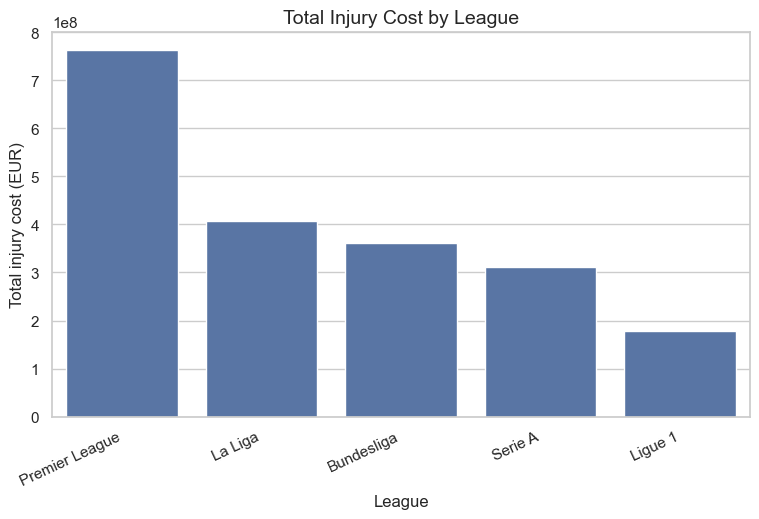

In [36]:
league_cost = (df_plot.groupby("league", as_index=False)["injury_cost_eur"]
               .sum()
               .sort_values("injury_cost_eur", ascending=False))

plt.figure(figsize=(9,5))
sns.barplot(data=league_cost, x="league", y="injury_cost_eur")
plt.xticks(rotation=25, ha="right")
plt.xlabel("League")
plt.ylabel("Total injury cost (EUR)")
plt.title("Total Injury Cost by League")
plt.show()

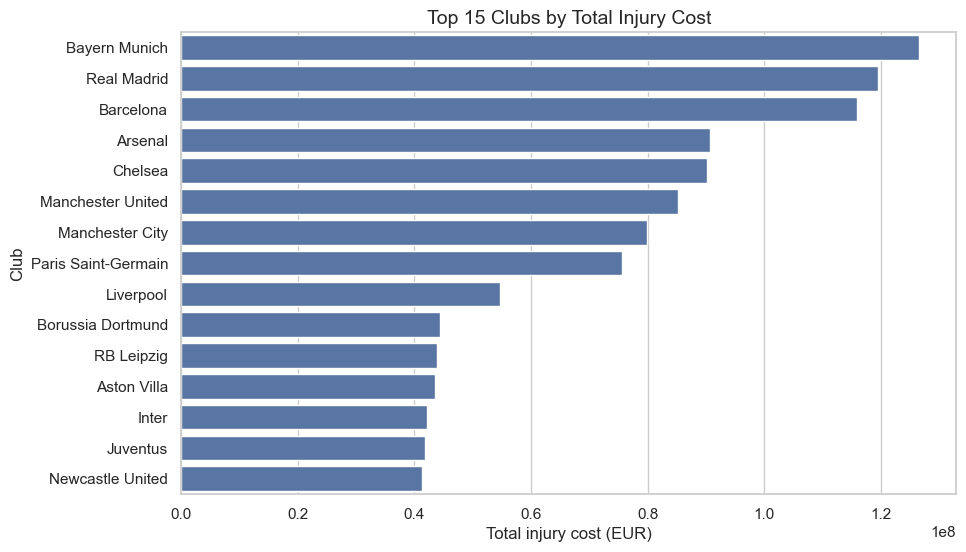

In [37]:
club_cost = (df_plot.groupby("club", as_index=False)["injury_cost_eur"]
             .sum()
             .sort_values("injury_cost_eur", ascending=False)
             .head(15))

plt.figure(figsize=(10,6))
sns.barplot(data=club_cost, y="club", x="injury_cost_eur")
plt.xlabel("Total injury cost (EUR)")
plt.ylabel("Club")
plt.title("Top 15 Clubs by Total Injury Cost")
plt.show()

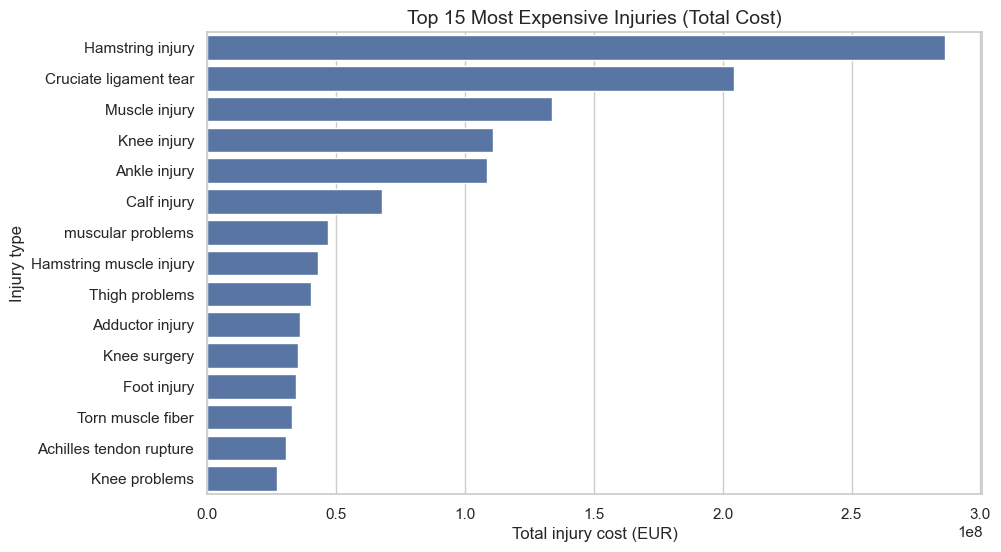

In [38]:
inj_cost = (df_plot.groupby("Injury", as_index=False)["injury_cost_eur"]
            .sum()
            .sort_values("injury_cost_eur", ascending=False)
            .head(15))

plt.figure(figsize=(10,6))
sns.barplot(data=inj_cost, y="Injury", x="injury_cost_eur")
plt.xlabel("Total injury cost (EUR)")
plt.ylabel("Injury type")
plt.title("Top 15 Most Expensive Injuries (Total Cost)")
plt.show()

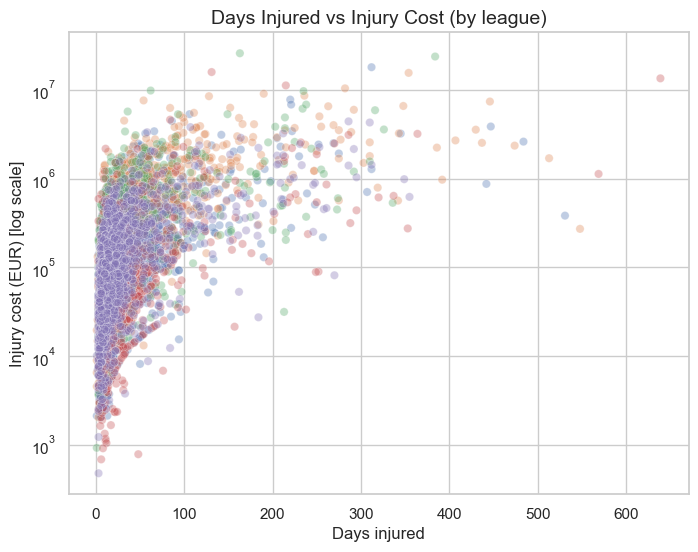

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x="Days", y="injury_cost_eur", hue="league", alpha=0.35, legend=False)
plt.yscale("log")
plt.xlabel("Days injured")
plt.ylabel("Injury cost (EUR) [log scale]")
plt.title("Days Injured vs Injury Cost (by league)")
plt.show()

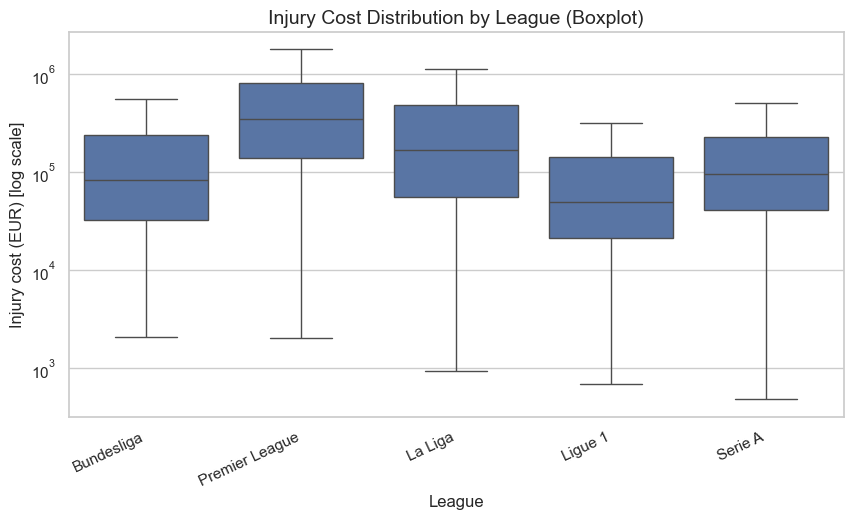

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_plot, x="league", y="injury_cost_eur", showfliers=False)
plt.yscale("log")
plt.xticks(rotation=25, ha="right")
plt.xlabel("League")
plt.ylabel("Injury cost (EUR) [log scale]")
plt.title("Injury Cost Distribution by League (Boxplot)")
plt.show()

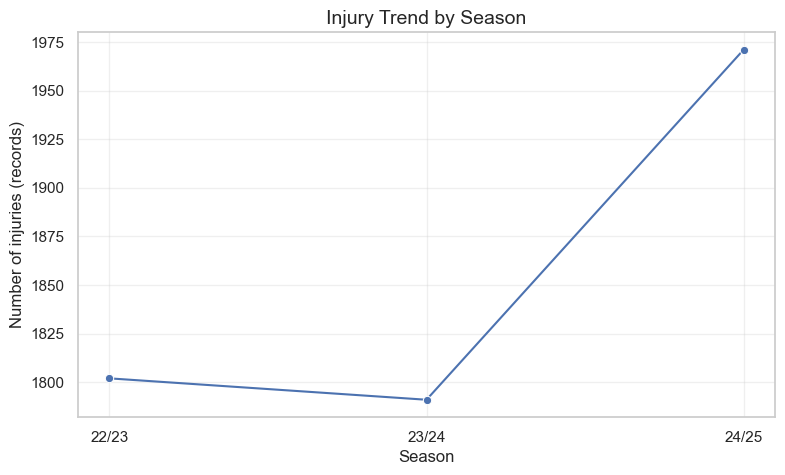

,Season,injury_count
0,22/23,1802
1,23/24,1791
2,24/25,1971


In [41]:
# Trend of injuries over seasons (count of records per season)
season_trend = (df_plot.groupby("Season", as_index=False)
                .size()
                .rename(columns={"size": "injury_count"})
                .sort_values("Season"))

plt.figure(figsize=(9,5))
sns.lineplot(data=season_trend, x="Season", y="injury_count", marker="o")
plt.xlabel("Season")
plt.ylabel("Number of injuries (records)")
plt.title("Injury Trend by Season")
plt.grid(True, alpha=0.3)
plt.show()

display(season_trend)

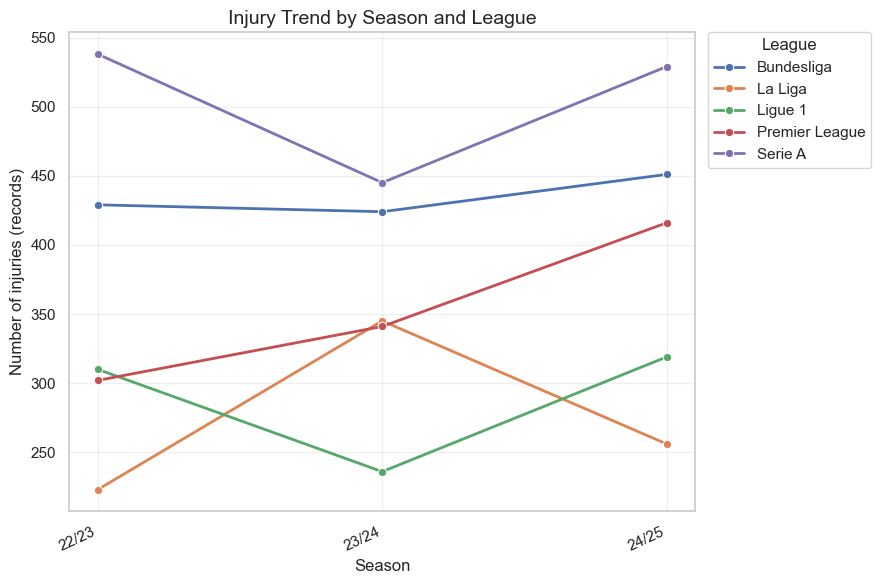

,Season,league,injury_count
0,22/23,Bundesliga,429
1,22/23,La Liga,223
2,22/23,Ligue 1,310
3,22/23,Premier League,302
4,22/23,Serie A,538
5,23/24,Bundesliga,424
6,23/24,La Liga,345
7,23/24,Ligue 1,236
8,23/24,Premier League,341
9,23/24,Serie A,445


In [42]:
# Trend of injuries by season AND league (counts) — improved version

# 1) Aggregate
season_league_trend = (df_plot.groupby(["Season", "league"], as_index=False)
                       .size()
                       .rename(columns={"size": "injury_count"}))

# 2) Force a clean chronological season order (so the line doesn't zig-zag)
season_order = sorted(season_league_trend["Season"].unique(),
                      key=lambda s: int(str(s).split("/")[0]))  # Sort by first year (22/23 -> 22)

season_league_trend["Season"] = pd.Categorical(season_league_trend["Season"],
                                              categories=season_order,
                                              ordered=True)

season_league_trend = season_league_trend.sort_values(["Season", "league"])

# 3) Plot
plt.figure(figsize=(11, 6))
ax = sns.lineplot(
    data=season_league_trend,
    x="Season",
    y="injury_count",
    hue="league",
    marker="o",
    linewidth=2
)

ax.set_xlabel("Season")
ax.set_ylabel("Number of injuries (records)")
ax.set_title("Injury Trend by Season and League")
ax.grid(True, alpha=0.3)
plt.xticks(rotation=25, ha="right")

# 4) Legend moved to the right (outside)
plt.legend(title="League", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

# 5) Make room for legend
plt.tight_layout(rect=[0, 0, 0.82, 1])
plt.show()

display(season_league_trend)

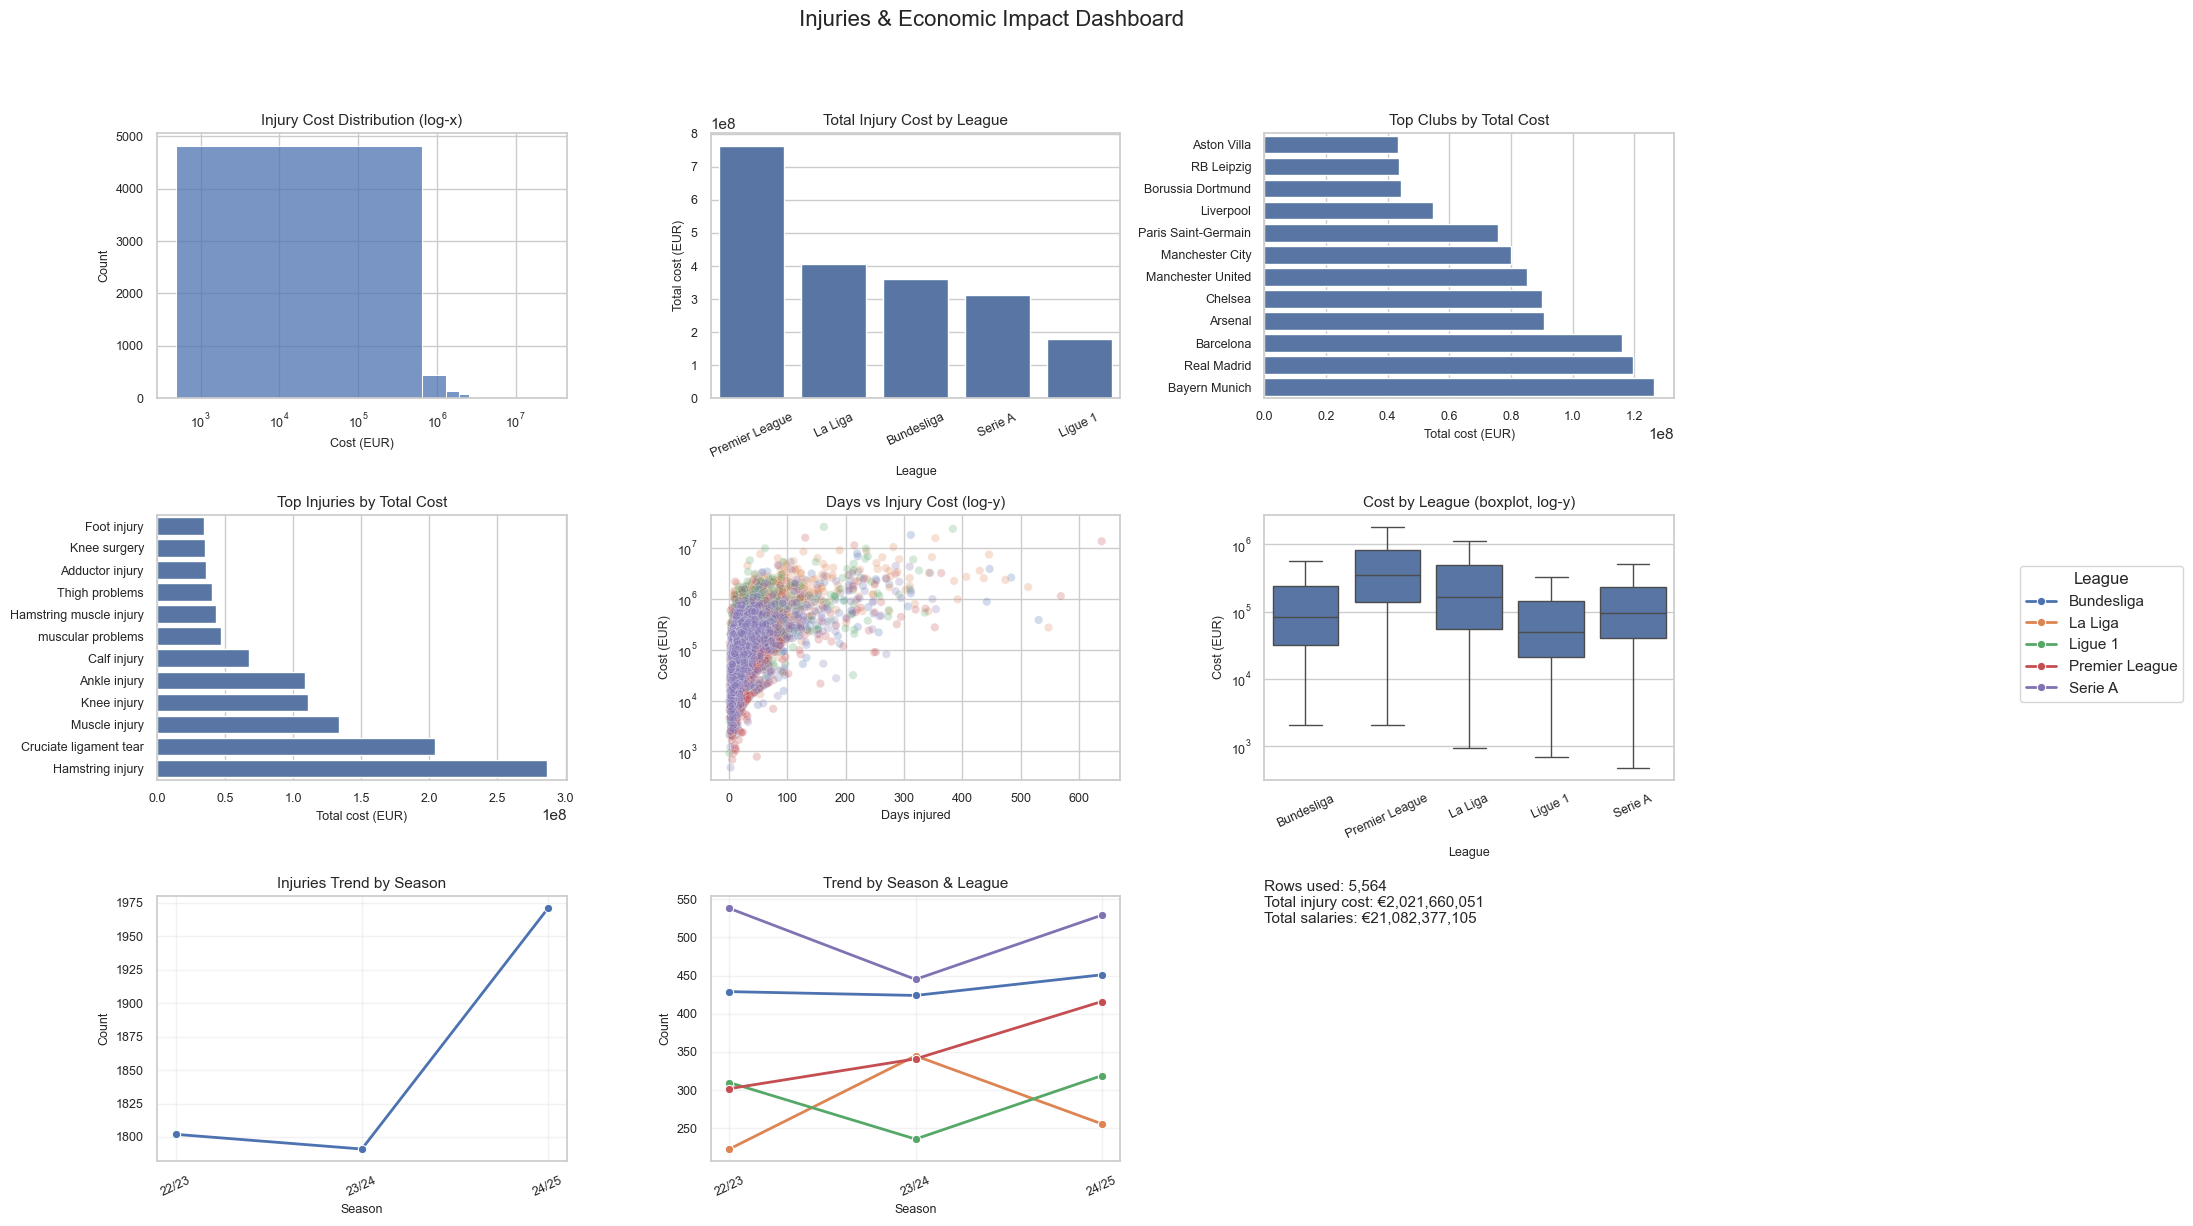

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="whitegrid")

# =========================
# DASHBOARD — All charts in one figure (small multiples)
# Requires: df_plot already cleaned + numeric
# =========================

# ---- Aggregations (reused across plots) ----
league_cost = (df_plot.groupby("league", as_index=False)["injury_cost_eur"]
               .sum()
               .sort_values("injury_cost_eur", ascending=False))

top_clubs = (df_plot.groupby("club", as_index=False)["injury_cost_eur"]
             .sum()
             .sort_values("injury_cost_eur", ascending=False)
             .head(12))  # 12 to fit small plot

top_injuries = (df_plot.groupby("Injury", as_index=False)["injury_cost_eur"]
                .sum()
                .sort_values("injury_cost_eur", ascending=False)
                .head(12))

season_trend = (df_plot.groupby("Season", as_index=False)
                .size()
                .rename(columns={"size": "injury_count"}))

season_order = sorted(season_trend["Season"].unique(),
                      key=lambda s: int(str(s).split("/")[0]))

season_trend["Season"] = pd.Categorical(season_trend["Season"], categories=season_order, ordered=True)
season_trend = season_trend.sort_values("Season")

season_league_trend = (df_plot.groupby(["Season", "league"], as_index=False)
                       .size()
                       .rename(columns={"size": "injury_count"}))
season_league_trend["Season"] = pd.Categorical(season_league_trend["Season"], categories=season_order, ordered=True)
season_league_trend = season_league_trend.sort_values(["Season", "league"])

# ---- Figure layout (3x3 grid; last panel empty) ----
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
fig.suptitle("Injuries & Economic Impact Dashboard", fontsize=16, y=1.02)

# Helper: small labels
def small(ax):
    ax.tick_params(axis="both", labelsize=9)
    ax.title.set_fontsize(11)
    ax.xaxis.label.set_size(9)
    ax.yaxis.label.set_size(9)

# (1) Histogram of injury cost (log-x)
ax = axes[0, 0]
sns.histplot(df_plot["injury_cost_eur"], bins=40, ax=ax)
ax.set_xscale("log")
ax.set_title("Injury Cost Distribution (log-x)")
ax.set_xlabel("Cost (EUR)")
ax.set_ylabel("Count")
small(ax)

# (2) Total cost by league
ax = axes[0, 1]
sns.barplot(data=league_cost, x="league", y="injury_cost_eur", ax=ax)
ax.set_title("Total Injury Cost by League")
ax.set_xlabel("League")
ax.set_ylabel("Total cost (EUR)")
ax.tick_params(axis="x", rotation=25)
small(ax)

# (3) Top clubs by cost (horizontal)
ax = axes[0, 2]
sns.barplot(data=top_clubs.sort_values("injury_cost_eur"), y="club", x="injury_cost_eur", ax=ax)
ax.set_title("Top Clubs by Total Cost")
ax.set_xlabel("Total cost (EUR)")
ax.set_ylabel("")
small(ax)

# (4) Top injuries by cost (horizontal)
ax = axes[1, 0]
sns.barplot(data=top_injuries.sort_values("injury_cost_eur"), y="Injury", x="injury_cost_eur", ax=ax)
ax.set_title("Top Injuries by Total Cost")
ax.set_xlabel("Total cost (EUR)")
ax.set_ylabel("")
small(ax)

# (5) Scatter: Days vs Cost (log-y)
ax = axes[1, 1]
sns.scatterplot(data=df_plot, x="Days", y="injury_cost_eur", hue="league", alpha=0.25, legend=False, ax=ax)
ax.set_yscale("log")
ax.set_title("Days vs Injury Cost (log-y)")
ax.set_xlabel("Days injured")
ax.set_ylabel("Cost (EUR)")
small(ax)

# (6) Boxplot: cost by league (log-y)
ax = axes[1, 2]
sns.boxplot(data=df_plot, x="league", y="injury_cost_eur", showfliers=False, ax=ax)
ax.set_yscale("log")
ax.set_title("Cost by League (boxplot, log-y)")
ax.set_xlabel("League")
ax.set_ylabel("Cost (EUR)")
ax.tick_params(axis="x", rotation=25)
small(ax)

# (7) Trend: injuries by season
ax = axes[2, 0]
sns.lineplot(data=season_trend, x="Season", y="injury_count", marker="o", linewidth=2, ax=ax)
ax.set_title("Injuries Trend by Season")
ax.set_xlabel("Season")
ax.set_ylabel("Count")
ax.grid(True, alpha=0.25)
ax.tick_params(axis="x", rotation=25)
small(ax)

# (8) Trend: injuries by season & league (legend outside)
ax = axes[2, 1]
line_ax = sns.lineplot(data=season_league_trend, x="Season", y="injury_count",
                       hue="league", marker="o", linewidth=2, ax=ax)
ax.set_title("Trend by Season & League")
ax.set_xlabel("Season")
ax.set_ylabel("Count")
ax.grid(True, alpha=0.25)
ax.tick_params(axis="x", rotation=25)
small(ax)

# Grab legend handles/labels from this axis, then move legend to the right of the whole figure
handles, labels = ax.get_legend_handles_labels()
ax.legend_.remove()  # remove local legend

fig.legend(handles, labels, title="League", loc="center left", bbox_to_anchor=(1.01, 0.5))

# (9) Empty panel (optional notes)
axes[2, 2].axis("off")
axes[2, 2].text(0.0, 0.9,
                f"Rows used: {len(df_plot):,}\n"
                f"Total injury cost: €{df_plot['injury_cost_eur'].sum():,.0f}\n"
                f"Total salaries: €{df_plot['salary_eur'].sum():,.0f}",
                fontsize=11)

plt.tight_layout(rect=[0, 0, 0.85, 0.98])  # leave space on right for legend
plt.show()